In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

In [87]:
df=pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\dataset\gurgaon_properties_missing_value_imputation.csv")

In [88]:
df

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,2,2,2,2.0,New Property,1333.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,house,independent,sector 57,4.75,28788.0,3,3,3,2.0,Moderately Old,1650.0,0,0,1,0,0,2,96
3487,house,dlf city phase 1,sector 26,5.50,30556.0,4,4,3,2.0,Moderately Old,1800.0,1,1,0,1,0,0,69
3488,house,dlf city plots phase 2,sector 25,4.25,31481.0,3,2,3,2.0,Old Property,1350.0,1,0,0,0,0,0,35
3489,house,dlf city phase 1,sector 26,4.50,33333.0,3,3,2,2.0,Moderately Old,1350.0,1,1,0,0,0,0,70


In [89]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [90]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 7,0.45,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28
1,flat,sector 3,0.50,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37
2,flat,sohna road road,0.40,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36
3,flat,sector 61,1.47,2,2,2,2.0,New Property,1333.0,1,0,0,0,0,0,76
4,flat,sector 92,0.70,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0


# Luxury Score

<Axes: >

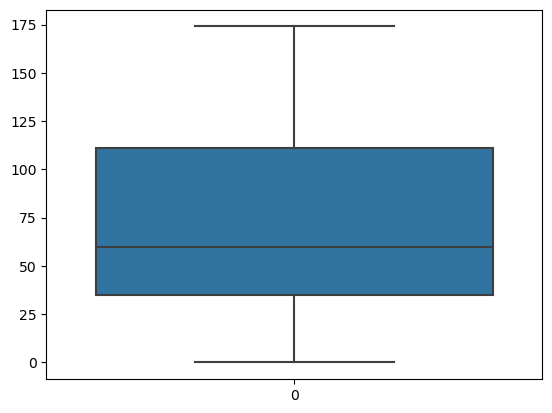

In [91]:
sns.boxplot(df['luxury_score'])

In [92]:
def categories_luxury(score):
     if 0<=score<50:
        return 'low'
     elif 50<=score<=150:
        return 'medium'
     elif 150<score<=175:
        return 'high'
     else :
        return None

In [93]:
train_df['luxury_category']=train_df['luxury_score'].apply(categories_luxury)

In [94]:
train_df

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 7,0.45,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28,low
1,flat,sector 3,0.50,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37,low
2,flat,sohna road road,0.40,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36,low
3,flat,sector 61,1.47,2,2,2,2.0,New Property,1333.0,1,0,0,0,0,0,76,medium
4,flat,sector 92,0.70,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,house,sector 57,4.75,3,3,3,2.0,Moderately Old,1650.0,0,0,1,0,0,2,96,medium
3487,house,sector 26,5.50,4,4,3,2.0,Moderately Old,1800.0,1,1,0,1,0,0,69,medium
3488,house,sector 25,4.25,3,2,3,2.0,Old Property,1350.0,1,0,0,0,0,0,35,low
3489,house,sector 26,4.50,3,3,2,2.0,Moderately Old,1350.0,1,1,0,0,0,0,70,medium


# FloorNum

<Axes: >

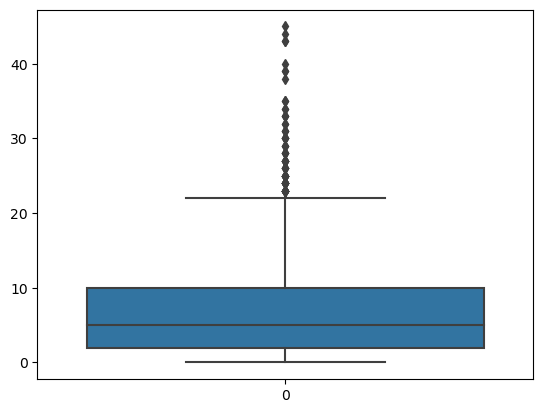

In [95]:
sns.boxplot(train_df['floorNum'])

In [96]:
def categories_floor(floor):
    if 0<=floor<=2:
        return 'low floor'
    elif 3<=floor<=10:
        return 'mid floor'
    elif 11<=floor<=51:
        return 'High floor'
    else:
        return None

In [97]:
train_df['floor_categories']=train_df['floorNum'].apply(categories_floor)

In [98]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_categories
0,flat,sector 7,0.45,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28,low,mid floor
1,flat,sector 3,0.50,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37,low,low floor
2,flat,sohna road road,0.40,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36,low,High floor
3,flat,sector 61,1.47,2,2,2,2.0,New Property,1333.0,1,0,0,0,0,0,76,medium,low floor
4,flat,sector 92,0.70,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0,low,mid floor


In [99]:
train_df.drop(columns=['luxury_score','floorNum'],inplace=True)

In [100]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_categories
0,flat,sector 7,0.45,2,2,1,Relatively New,1000.0,0,0,0,0,0,0,low,mid floor
1,flat,sector 3,0.50,2,2,1,Old Property,722.0,0,0,0,0,0,2,low,low floor
2,flat,sohna road road,0.40,2,2,3,New Property,661.0,0,0,0,0,0,0,low,High floor
3,flat,sector 61,1.47,2,2,2,New Property,1333.0,1,0,0,0,0,0,medium,low floor
4,flat,sector 92,0.70,2,2,3,Under Construction,1217.0,1,0,0,0,0,0,low,mid floor


In [101]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded=train_df.copy()

catogorical_cols=train_df.select_dtypes(include=['object']).columns
for col in catogorical_cols:
    oe=OrdinalEncoder()
    data_label_encoded[col]=oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
x_label=data_label_encoded.drop('price',axis=1)
y_label=data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 33 road', 'sector 36', 'sector 36 road',
       'sector 36a', 'sector 37c', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 

In [102]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_categories
0,0.0,82.0,2,2,1.0,3.0,1000.0,0,0,0,0,0,0,1.0,2.0
1,0.0,36.0,2,2,1.0,2.0,722.0,0,0,0,0,0,2,1.0,1.0
2,0.0,114.0,2,2,3.0,1.0,661.0,0,0,0,0,0,0,1.0,0.0
3,0.0,72.0,2,2,2.0,1.0,1333.0,1,0,0,0,0,0,2.0,1.0
4,0.0,108.0,2,2,3.0,4.0,1217.0,1,0,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,1.0,67.0,3,3,3.0,0.0,1650.0,0,0,1,0,0,2,2.0,1.0
3487,1.0,33.0,4,4,3.0,0.0,1800.0,1,1,0,1,0,0,2.0,1.0
3488,1.0,32.0,3,2,3.0,2.0,1350.0,1,0,0,0,0,0,1.0,1.0
3489,1.0,33.0,3,3,2.0,0.0,1350.0,1,1,0,0,0,0,2.0,1.0


In [103]:
y_label

0       0.45
1       0.50
2       0.40
3       1.47
4       0.70
        ... 
3486    4.75
3487    5.50
3488    4.25
3489    4.50
3490    3.25
Name: price, Length: 3491, dtype: float64

# Correleration Analysis

<Axes: >

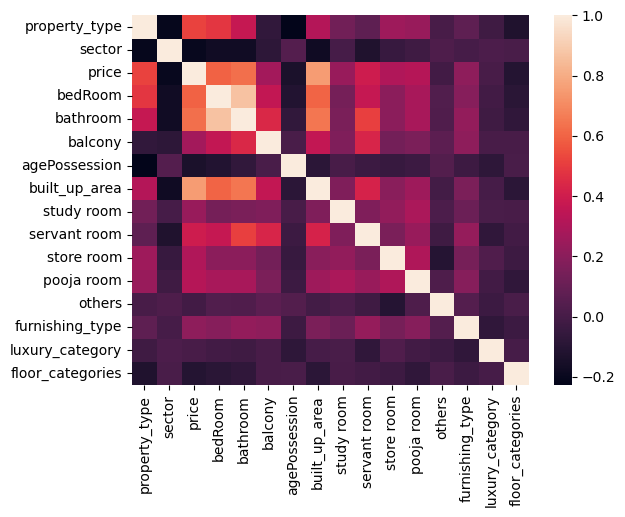

In [104]:
# numeric_columns = train_df.select_dtypes(include=['number'])

# correlation_matrix = numeric_columns.corr()

# sns.heatmap(correlation_matrix)
sns.heatmap(data_label_encoded.corr())

In [105]:
fi_df1=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coef'})
fi_df1

,feature,corr_coef
0,sector,-0.200152
1,price,1.000000
2,bedRoom,0.594216
3,bathroom,0.628336
4,balcony,0.267614
5,agePossession,-0.138421
6,built_up_area,0.752048
7,study room,0.242024
8,servant room,0.394131
9,store room,0.306539


# Random Forest Feature Importance

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(x_label,y_label)
fi_df2=pd.DataFrame({'feature':x_label.columns,'rf_importance':rf_label.feature_importances_}).sort_values(by='rf_importance',ascending=False)

In [107]:
fi_df2

,feature,rf_importance
6,built_up_area,0.653076
1,sector,0.102637
0,property_type,0.102524
3,bathroom,0.027420
2,bedRoom,0.024949
8,servant room,0.018648
5,agePossession,0.015056
4,balcony,0.012828
9,store room,0.009676
7,study room,0.007712


# Gradient Boosting Feature importance

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label=GradientBoostingRegressor()
gb_label.fit(x_label,y_label)
fi_df3=pd.DataFrame({'feature':x_label.columns,'gb_importance':gb_label.feature_importances_}).sort_values(by='gb_importance',ascending=False)

In [109]:
fi_df3

,feature,gb_importance
6,built_up_area,0.686850
1,sector,0.099038
0,property_type,0.095781
2,bedRoom,0.040349
3,bathroom,0.026567
8,servant room,0.026002
9,store room,0.010753
5,agePossession,0.006366
7,study room,0.003731
4,balcony,0.001514


# Permutation Importance

In [112]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train_label,x_test_label,y_train_label,y_test_label=train_test_split(x_label,y_label,test_size=0.2,random_state=42)

rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(x_train_label,y_train_label)

perm_importance=permutation_importance(rf_label,x_test_label,y_test_label,n_repeats=30,random_state=42)
fi_df4=pd.DataFrame({'feature':x_label.columns,'permutation_importance':perm_importance.importances_mean}).sort_values(by='permutation_importance',ascending=False)

In [113]:
fi_df4

,feature,permutation_importance
6,built_up_area,0.727173
0,property_type,0.185993
1,sector,0.142078
8,servant room,0.019238
2,bedRoom,0.012515
3,bathroom,0.007266
4,balcony,0.005496
13,luxury_category,0.005173
7,study room,0.004573
14,floor_categories,0.002740


# Lasso

In [114]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x_label)

lasso=Lasso(alpha=0.01,random_state=42)
lasso.fit(x_scaler,y_label)

fi_df5=pd.DataFrame({
    'feature':x_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.478569
0,property_type,0.730705
3,bathroom,0.427748
9,store room,0.203064
7,study room,0.170289
8,servant room,0.130690
12,furnishing_type,0.128573
10,pooja room,0.085541
13,luxury_category,0.037881
11,others,-0.016277


# RFE

In [115]:
from sklearn.feature_selection import RFE

estimator=RandomForestRegressor()

selector_label=RFE(estimator,n_features_to_select=x_label.shape[1],step=1)
selector_label=selector_label.fit(x_label,y_label)

selected_features=x_label.columns[selector_label.support_]
selected_coefficients=selector_label.estimator_.feature_importances_

fi_df6=pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score',ascending=False)


In [116]:
fi_df6

,feature,rfe_score
6,built_up_area,0.656332
1,sector,0.105344
0,property_type,0.099838
3,bathroom,0.026550
2,bedRoom,0.022078
8,servant room,0.020636
5,agePossession,0.014959
4,balcony,0.012247
9,store room,0.007680
7,study room,0.007520


# Linear Regression Weights

In [117]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_scaler,y_label)

fi_df7=pd.DataFrame({
    'feature':x_label.columns,
    'reg_coeffs':lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)

In [118]:
fi_df7

,feature,reg_coeffs
6,built_up_area,1.486116
0,property_type,0.743116
3,bathroom,0.509845
9,store room,0.206487
7,study room,0.177894
12,furnishing_type,0.137716
8,servant room,0.131304
10,pooja room,0.091218
13,luxury_category,0.048860
11,others,-0.023508


In [119]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [120]:
final_fi_df

,corr_coef,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.200152,0.102637,0.099038,0.142078,-0.053344,0.105344,-0.062067
bedRoom,0.594216,0.024949,0.040349,0.012515,-0.106698,0.022078,-0.199968
bathroom,0.628336,0.027420,0.026567,0.007266,0.427748,0.026550,0.509845
balcony,0.267614,0.012828,0.001514,0.005496,-0.033793,0.012247,-0.053221
agePossession,-0.138421,0.015056,0.006366,0.000502,-0.044492,0.014959,-0.054036
built_up_area,0.752048,0.653076,0.686850,0.727173,1.478569,0.656332,1.486116
study room,0.242024,0.007712,0.003731,0.004573,0.170289,0.007520,0.177894
servant room,0.394131,0.018648,0.026002,0.019238,0.130690,0.020636,0.131304
store room,0.306539,0.009676,0.010753,0.000400,0.203064,0.007680,0.206487


In [121]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [123]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area       0.751245
sector              0.123748
bedRoom             0.027630
bathroom            0.024327
servant room        0.023330
agePossession       0.010244
balcony             0.008883
store room          0.007910
study room          0.006508
luxury_category     0.005570
furnishing_type     0.003874
pooja room          0.002841
floor_categories    0.002199
others              0.001691
dtype: float64

In [124]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_categories
0,0.0,82.0,2,2,1.0,3.0,1000.0,0,0,0,0,0,0,1.0,2.0
1,0.0,36.0,2,2,1.0,2.0,722.0,0,0,0,0,0,2,1.0,1.0
2,0.0,114.0,2,2,3.0,1.0,661.0,0,0,0,0,0,0,1.0,0.0
3,0.0,72.0,2,2,2.0,1.0,1333.0,1,0,0,0,0,0,2.0,1.0
4,0.0,108.0,2,2,3.0,4.0,1217.0,1,0,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,1.0,67.0,3,3,3.0,0.0,1650.0,0,0,1,0,0,2,2.0,1.0
3487,1.0,33.0,4,4,3.0,0.0,1800.0,1,1,0,1,0,0,2.0,1.0
3488,1.0,32.0,3,2,3.0,2.0,1350.0,1,0,0,0,0,0,1.0,1.0
3489,1.0,33.0,3,3,2.0,0.0,1350.0,1,1,0,0,0,0,2.0,1.0


In [131]:
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=42)

score=cross_val_score(rf,x_label,y_label,cv=5,scoring='r2')

In [132]:
score.mean()

0.6852298218637727

In [133]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

score=cross_val_score(rf,x_label.drop(columns=['pooja room','study room','others']),y_label,cv=5,scoring='r2')

In [134]:
score.mean()

0.6859329052941737

In [136]:
export_df=x_label.drop(columns=['pooja room','study room','others'])
export_df['price']=y_label

In [137]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv',index=False)